$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

#### Name: Raizan Rahmat (G1502425E)

#### Email: S150015@e.ntu.edu.sg

### Qn 4: Velocity-Pressure Formulation for Flow Past an Obstacle
#### Domain Design - Channel Flow
I attempted to simulate the flow past an obstacle by adapting the template velocity-pressure formulation provided. The initial design of the flow is that it was restricted to a channel (pipe) of *4 units* (across 40 grids) in the cross section (`y_span`) and the length of the flow simulated lengthwise is 4 times that, i.e. *20 units* (200 grids) along the channel (`x_span`) (**note**: consequently these were changed in attempts to simulate better flow under different configurations). The flow is forced from left to right.

#### Obstacle Design
The obstacle is a rigid-square simple box in the middle of the channel in both directions (`x` and `y`). The size of the box is 20 grid boxes in the y-direction and 20 grid boxes in the x-direction (**note**: like the channel design, this was also subsequently modified to attempt more stable flows under different configurations).

A sample picture of the setup, taken from one of the simulations, is shown here:
![Image not found! Make sure it is in the same folder as this python notebook](sample_setup.png "Experiment Design")
*Figure 1: Initial experiment design.*

#### Boundary Conditions
Boundary conditions were set for the rigid walls of channel, the inlet, exit and also the obstacles. Several configurations were tested to achieve a relatively stable and 'realistic' flow in the simulations plots. The final configuration are commented substantially in the codes to be self-explanatory. The following summarise these configurations.
1. At the inlet, I prescribe the inlet boundary condition of constant velocity in the u-direction at every time step (`u[:,0]=u_start=1`). This value in the u-direction at every time step is also set as the *initial condition* for the u-direction speed everywhere along the channel (`u = np.ones((ny, nx))`). This ensures the flow goes into stable state as soon as possible. Otherwise I obtained unphysical-looking flow at the start as follows (see velocity at the inlet on the left-side):
![Image not found! Make sure it is in the same folder as this python notebook](initial_notok.png "Results without initialisation")
*Figure 2: Outcome with no initialisation of u-direction speed to be 1 everywhere.*
With the initialisation, the inlet velocity at the initial timesteps looks more realistic:
![Image not found! Make sure it is in the same folder as this python notebook](initial_ok.png "Results with initialisation")
*Figure 3: With initialisation.*
2. Near the exit, only an artificial boundary condition for velocity can be set since the flow is artificially cut off, and therefore not possible to predict what will occur at the exit, and how it can conversely affect flow within the domain. I set zero gradient at the exit in the direction of x for each time step, i.e. `u[:,-1] = u[:,-2]` [Reference: Eq. 2.54 "Essential Computational Fluid Dynamics", Zikanov (2010)].
3. At the top and bottom walls of the channel, the tangential velocity is set to zero, i.e. `u[0,:]=0` and `u[-1,:]=0` to impose a no-slip boundary condition. 
4. I set the vertical velocity at the inlet and exit to be zero, i.e. to force laminar flow at these points (`v[:,-1]= 0` and `v[:,0]=0`).
5. Vertical velocity at each of the bottom and top surface is also zero, i.e. `v[0,:]=0` and `v[-1,:]=0`.
6. For pressure boundary conditions, I applied the same boundary conditions recommended from the sample cavity-lid program for the channel and similarly to the obstacles. This type of boundary condition is also recommended by Pozrikidis (2009) in "Fluid Dynamics - Theory, Computation and Numerical Simulation" in equation 8.6.10.
7. Pressure values inside the obstacle is all set to zero.

#### Initial Results
The initial results demonstrate reasonably-designed flow at the inlet, exit and around the rigid boundaries of the channel (top and bottom surface) as well as around the obstacles.
![Image not found! Make sure it is in the same folder as this python notebook](ok_animation.gif "Reasonable flow")
*Figure 4: Initial results with reasonable looking flow around the obstacle.*


#### Improvements over the Initial Flow
The initial flow is still lacking in 2 ways.
1. The pressure field is very large during and at the end of the simulation (for e.g. see pressure field scale in Figure 4). On investigation, the pressure increases almost monotonically everywhere at every time step. So instead I re-initialise p to all zeros at every time step n.
2. Also on Figure 4, the flow on the right side of the obstacle is also uncharacteristically flowing at normal angles out of the surface. The error arises from wrongly coding the last indices of the arrays used to define boundary conditions. This is a programmatical error in my own Python coding convention. 

Upon fixing these 2 errors (and experimenting with other configurations, such as channel width and obstacle size to correct for the instability - see next section), I got a better flow from the simulation.
![Image not found! Make sure it is in the same folder as this python notebook](better_sim.png "Better flow")
*Figure 5: Flow around the obstacle with lower pressure values and characteristic flow around boundaries.*

#### Varying the Reynold's Number
The Reynold's number was adjusted to a high value gradually, and hence low viscosity value is applied to the formulation to simulate turbulent flow. When the viscosity is low enough and the number of time steps have lapsed long enough, the flow becomes unstable at one of the obstacle's corners (bottom left) as shown in the following figure.
![Image not found! Make sure it is in the same folder as this python notebook](pre_breakdown.png "Pre-breakdown abnormal increase in pressure and change in velocity vector")
*Figure 6: With low viscosity and enough time elapsed, the flow at the bottom left corner showed signs of breaking down (steep increase in pressure field at that point).*

![Image not found! Make sure it is in the same folder as this python notebook](breakdown_point.png "At breakdown")
*Figure 7: Finally the flow breaks down at long enough time step.*

#### Re-configurations explored to fix the breakdown
A number of checks/configurations were made in attempts to stabilise the flow.
1. The CFL stability condition was checked. With the $\Delta t$, $\Delta x$ and $\Delta y$ used, I have checked that $C = \frac{u_x \Delta t}{\Delta x} + \frac{u_y \Delta t}{\Delta y} \leq C_{max}$ condition is met.
2. As the flow was found to be relatively faster near the obstacle where the instability sets in, I widened the channel (as shown in above figures with modified channel flow) to see if it can help relax the flow.
3. To remove the possibility of that particular corner or surface of the obstacle being coded wrongly for the boundary conditions (e.g. by not correctly using Python convention), I configured the obstacle such the it rests at the bottom of the channel (not shown). It appears that the problem is not unique to that corner, as the instability can appear at other corners too.
4. In a particular setting, I noticed that the u-direction velocity starts to become negative in value near the unstable bottom-left corner and the pressure starts to increase rapidly there. Consequently, I artificially forced the u-velocity to be the same as the stable counter part at the top-left corner to see what happens. At some point the flow becomes unstable downstream from the unstable corner (instability is shifted elsewhere).

All the attempts above suggest that at some point,the configuration I adopted is bound to break down, unless the simulation is allowed to run for short enough time (or low Reynold's number). Following is a simple diagnosis of the flow profile at particular point of maximum pressure as the Reynold's number is (1) changed near or at the breaking point (last time step) and (2) at time step equals to 100 for (3) selected Reynold's number and the associated $\nu$.

| $\nu$ | Re | Last timestep  | $P^{last}$ | $U^{last}$ | $V^{last}$ | $P^{100}$ | $U^{100}$ | $V^{100}$ | Remarks |
|---|---|---|---|---|---|---|---|---|
| 0.02  | 100  | 236   | 10,758  | -0.57  | 0.32  | 2.69  | 0.41 | -1.17 | Crashed near timestep 236 |
| 0.03  | 70   | 413   | 26,689  | -1.30  | 0.73  | 2.12  | 0.43 | -1.19 | Crashed near timestep 413 |
| 0.04  | 50   | 1000  | 4.83    | 0.33   | -0.81 | 1.79  | 0.45 | -1.18 | No crash at timestep 1000, see below |
| 0.1   | 20   | 1300  | 6.25  | 0.29  | -0.57  | 1.97 | 0.51  | -1.07 | No crash at timestep 1300, see below |

![Image not found! Make sure it is in the same folder as this python notebook](plt_004.png "At nu=0.04")
*Figure 8: Stable flow at timestep 1000 for viscosity = 0.04.*


![Image not found! Make sure it is in the same folder as this python notebook](plt_01.png "At nu=0.04")
*Figure 9: Stable flow at timestep 1300 for viscosity = 0.1.*

#### Summary and conclusions
1. I have managed to simulate the flow around the obstacles reasonably with the channel and obstacle design and with the boundary conditions applied.
2. By changing the Reynold's number to simulate turbulence, I did not however manage to get the kind of oscillating flow as shown in the link (http://physics.weber.edu/schroeder/fluids/using using a different approach) without crashing the program with uncharacteristic pressure and velocity field values at long-enough timesteps.
3. Some investigations into this have been to eliminate possible factors of the crash (e.g. too narrow a channel between the obstacle and the channel walls, or wrongly coded boundary conditions at the obstacle borders), but the instability have shown to be not unique to these possible causes.
4. In general the pressure tends to be higher at the chosen point (bottom left corner of obstacle) with lower viscosity, and this is consistent with the lower velocity in the u-direction, suggesting more pressure round the bend as the flow accommodates the corner by slowing down.
5. Further work and experimentation could possibly explore making modifications to the boundary conditions at the surfaces and/or corners (especially) of the obstacles to allow turbulent flow to move past the corners and surface more characteristically without crashing.

### Theory and Python Code
#### The Navier-Stokes and Pressure Poisson Equation
Navier Stokes Equations for $u$ and $v$ and the pressure poisson equation.

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math as mth
%matplotlib inline

We calculate the pressure field assuming that the current flow field is not divergent free, $\nabla \vb{u}^{n+1/2}\neq0$. 

$$\nabla^2 p^{n+1}=\frac{\rho}{\Delta t}\nabla\cdot\vb{u}^{n+1/2}-\rho\left(\left(\pad{u}{x}\right)^2+2\pad{u}{y}\pad{v}{x}+\left(\pad{u}{y}\right)^2\right)$$

which discretizes as:

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\quad .$$

### Pressure boundary conditions
The pressure boundary conditions have to be carefully evaluated. We can write the N.S. equation as

$$
\nabla p= \rho \left( -\pad{\vb{u}}{t}-\vb{u}\cdot\nabla\vb{u}+\nu\nabla^2\vb{u}\right)\quad.$$

Then we mutiply on both sides with the normal vector of the boundary $\vb{n}$ and obtain a  Neumann b.c. for the pressure:

$$\vb{n}\cdot\nabla p=\rho \vb{n}\cdot\left( -\pad{\vb{u}}{t} -\vb{u}\cdot\nabla\vb{u}+\nu\nabla^2\vb{u}\right)\quad.$$

On a rigid boundary, $u_1$ and $u_2$ are 0, thus the b.c. simplifies. An example is the following, the boundary condition for a rigid boundary with $y=0$ we obtain:
$$\pad{p}{y}=\rho \nu \ppad{u_2}{x_2}\quad.$$

### Finite difference scheme for the boundary nodes

To evaluate the above pressure gradient, we need to calculate the second derivative of the velocity on the boundary. Our previous scheme using the central difference does not work here, as we can't evaluate past the boundary. Instead we approximate the second derivative with

$$\left.\ppad{v}{y}\right|_{i,j=0}=\frac{1}{\Delta y^2}\left(v_{i,j=0}-2 v_{i,j=1}+v_{i,j=2}\right)$$

In [38]:
def presPoisson(p, dx, dy,rho, botb, dpth, lftb, wdth, ny, nx):
    pn = np.empty_like(p)
    p = np.zeros((ny, nx))
    
  
    # Term in square brackets
    b[1:-1,1:-1]=rho*(1/dt*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))-\
                 ((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx))**2-\
                 2*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dy)*(v[1:-1,2:]-v[1:-1,0:-2])/(2*dx))-\
                 ((v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))**2)

    for q in range(nit):
        pn = p.copy()
        p[1:-1,1:-1] = ((pn[1:-1,2:]+pn[1:-1,0:-2])*dy**2+(pn[2:,1:-1]+pn[0:-2,1:-1])*dx**2)/\
                        (2*(dx**2+dy**2)) -\
                        dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]

       
        # Apply the Neumann boundary condition as recommended above on all sides 
        p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:]) ## at y = 2
        p[0,:] = p[1,:] - rho*nu/dy*(-2*v[1,:]+v[2,:])     ## at y = 0
        
       
        p[:,0] = p[:,1] - rho*nu/dx*(-2*u[:,1]+u[:,2])     ## at x = 0
        p[:,-1] = p[:,-2] - rho*nu/dx*(-2*u[:,-2]+u[:,-3]) ## at x = 2   
        
        # We apply the same concept for boundary conditions at the top and bottom surfaces of the obstacles.
        # At bottom surface:      
        p[botb,lftb:(lftb+wdth+1)] = p[botb-1,lftb:(lftb+wdth+1)] - rho*nu/dy*(-2*v[botb-1,lftb:(lftb+wdth+1)]+v[botb-2,lftb:(lftb+wdth+1)])
        
        # At top surface:
        p[(botb+dpth),lftb:(lftb+wdth+1)] = p[(botb+dpth+1),lftb:(lftb+wdth+1)] - rho*nu/dy*(-2*v[(botb+dpth+1),lftb:(lftb+wdth+1)]+v[(botb+dpth+2),lftb:(lftb+wdth+1)]) #at y = 0
           
        # Likewise for the right and left surfaces of the obstacles
        # At the left surface:
        p[botb:(botb+dpth+1),lftb] = p[botb:(botb+dpth+1),lftb-1] - rho*nu/dx*(-2*u[botb:(botb+dpth+1),lftb-1]+u[botb:(botb+dpth+1),lftb-2]) #at x = 2
        
        # At the right surface:
        p[botb:(botb+dpth+1),(lftb+wdth)] = p[botb:(botb+dpth+1),(lftb+wdth+1)] - rho*nu/dx*(-2*u[botb:(botb+dpth+1),(lftb+wdth+1)]+u[botb:(botb+dpth+1),(lftb+wdth+2)]) #at x = 0
        
        # Pressure values inside obstacle should be zero
        # since there is no pressure flux in and out of the obstacle
        p[(botb+1):(botb+dpth),(lftb+1):(lftb+wdth)] = 0
        
    
    return p

Then we calculate the velocity field $\vb{u}^{n+1}$ using the above calculated pressure field.

The momentum equation in the $u$ direction:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

The momentum equation in the $v$ direction:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

In [39]:
def cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu, botb, dpth, lftb, wdth, X, Y, u_start):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    #--------------------------------------------
    # Initialise u values as initial condition
    #--------------------------------------------
    u[:,0] = u_start

    #-------------------------------------
    # Start iteration through timesteps
    #-------------------------------------
    for n in range(nt):
      
        un = u.copy()
        vn = v.copy()
        
        p = presPoisson(p, dx, dy, rho, botb, dpth, lftb, wdth, ny, nx) 
        
        #===================================
        # to locate position of maximum pressure and the maximum value itself, and the corresponding U and V
        # for debugging purposes
        #print(np.where(p == p.max()))
        #print(p.max())
        #print ("--- time: " + str(n))
        #print("P:" + str(p[40,68]))
        #print("U:" + str(u[40,68]))
        #print("V:" + str(v[40,68]))
        #===================================
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
                        dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,0:-2])+\
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))

        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
                        dt/(2*rho*dy)*(p[2:,1:-1]-p[0:-2,1:-1])+\
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+\
                        (dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])))

        #-------------------------------------------------------------
        # Apply boundary conditions to the inlet, exit points, as well
        # as the top and bottom boundary conditions.
        #-------------------------------------------------------------
        # Prescribing inlet boundary condition at the inlet itself.
        # i.e. at every time step, a constant u-direction speed enters the pipe
        # Ref: Eq. 2.53 "Essential Computational Fluid Dynamics", Zikanov (2010)
        u[:,0] = u_start

        # Near the exit, only an artificial boundary condition can be set since the
        # flow is artificially cut off, and therefore not possible to predict
        # what will occur at the exit, and how it can conversely affect flow
        # within the domain. Set zero gradient at the exit in the direction of x for each
        # time step
        # Ref: Eq. 2.54 "Essential Computational Fluid Dynamics", Zikanov (2010)
        u[:,-1] = u[:,-2]
        
        # Bottom and top surface of pipe has zero tangential velocity - no slip boundary condition
        u[0,:] = 0
        u[-1,:] = 0
        
        # Also set the vertical velocity at the inlet and exit to be zero, i.e. force laminar flow
        v[:,-1] = 0  # at exit
        v[:,0]  = 0  # at inlet
        
        # likewise vertical velocity at each of the bottom and top surface is also zero
        v[0,:]  = 0 # bottom surface
        v[-1,:] = 0 # top surface
        
        #-------------------------------------------------------------
        # Apply boundary conditions to the obstacle
        #-------------------------------------------------------------  
        # zero velocity everywhere at the obstacle
        u[botb:(botb+dpth+1),lftb:(lftb+wdth+1)] = 0
        v[botb:(botb+dpth+1),lftb:(lftb+wdth+1)] = 0
        
        # save each plot at selected time step intervals (for debugging purposes)
        output_step = 10
        if (True):
            if (n % output_step) == 0:
                fig = plt.figure(figsize=(100,50), dpi=25)
                plt.contourf(X,Y,p,alpha=0.5)    ### plotting the pressure field as a contour
                plt.tick_params(axis='both', which='major', labelsize=40)
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=50) 
                #plt.contour(X, Y, p, cmap='cool', vmin=0, vmax=400)               ### plotting the pressure field outlines
                plt.contour(X, Y, u/v)
                plt.quiver(X[::qres,::qres],Y[::qres,::qres],u[::qres,::qres],v[::qres,::qres]) ##plotting velocity
                #plt.streamplot(X[::qres,::qres],Y[::qres,::qres],u[::qres,::qres],v[::qres,::qres],linewidth=2, cmap=plt.cm.autumn)
                
                # To overlay an artificial obstacle over the plot using plt.broken_barh
                plt.broken_barh([(x[lftb+1],x[lftb+wdth-2]-x[lftb+1])], (y[botb+1],y[botb+dpth-2]-y[botb+1]), hold=None, facecolors='grey', alpha=0.8)
                plt.xlabel('X')
                plt.ylabel('Y')
                plt.title('time_step = ' + str(n) + ' nu = ' + str(nu), fontsize=40)
                # plot only every 10 plots
                if (n/output_step) < 10:
                    str_prepend = "0"
                else:
                    str_prepend = ""
                plt.savefig("plots/" + str(nu) + "_" + str_prepend + str(n/5) + ".png", format="png")
                plt.close()
                
        
    return u, v, p

/home/raizanrahmat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:82: RuntimeWarning: divide by zero encountered in divide
/home/raizanrahmat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:82: RuntimeWarning: invalid value encountered in divide


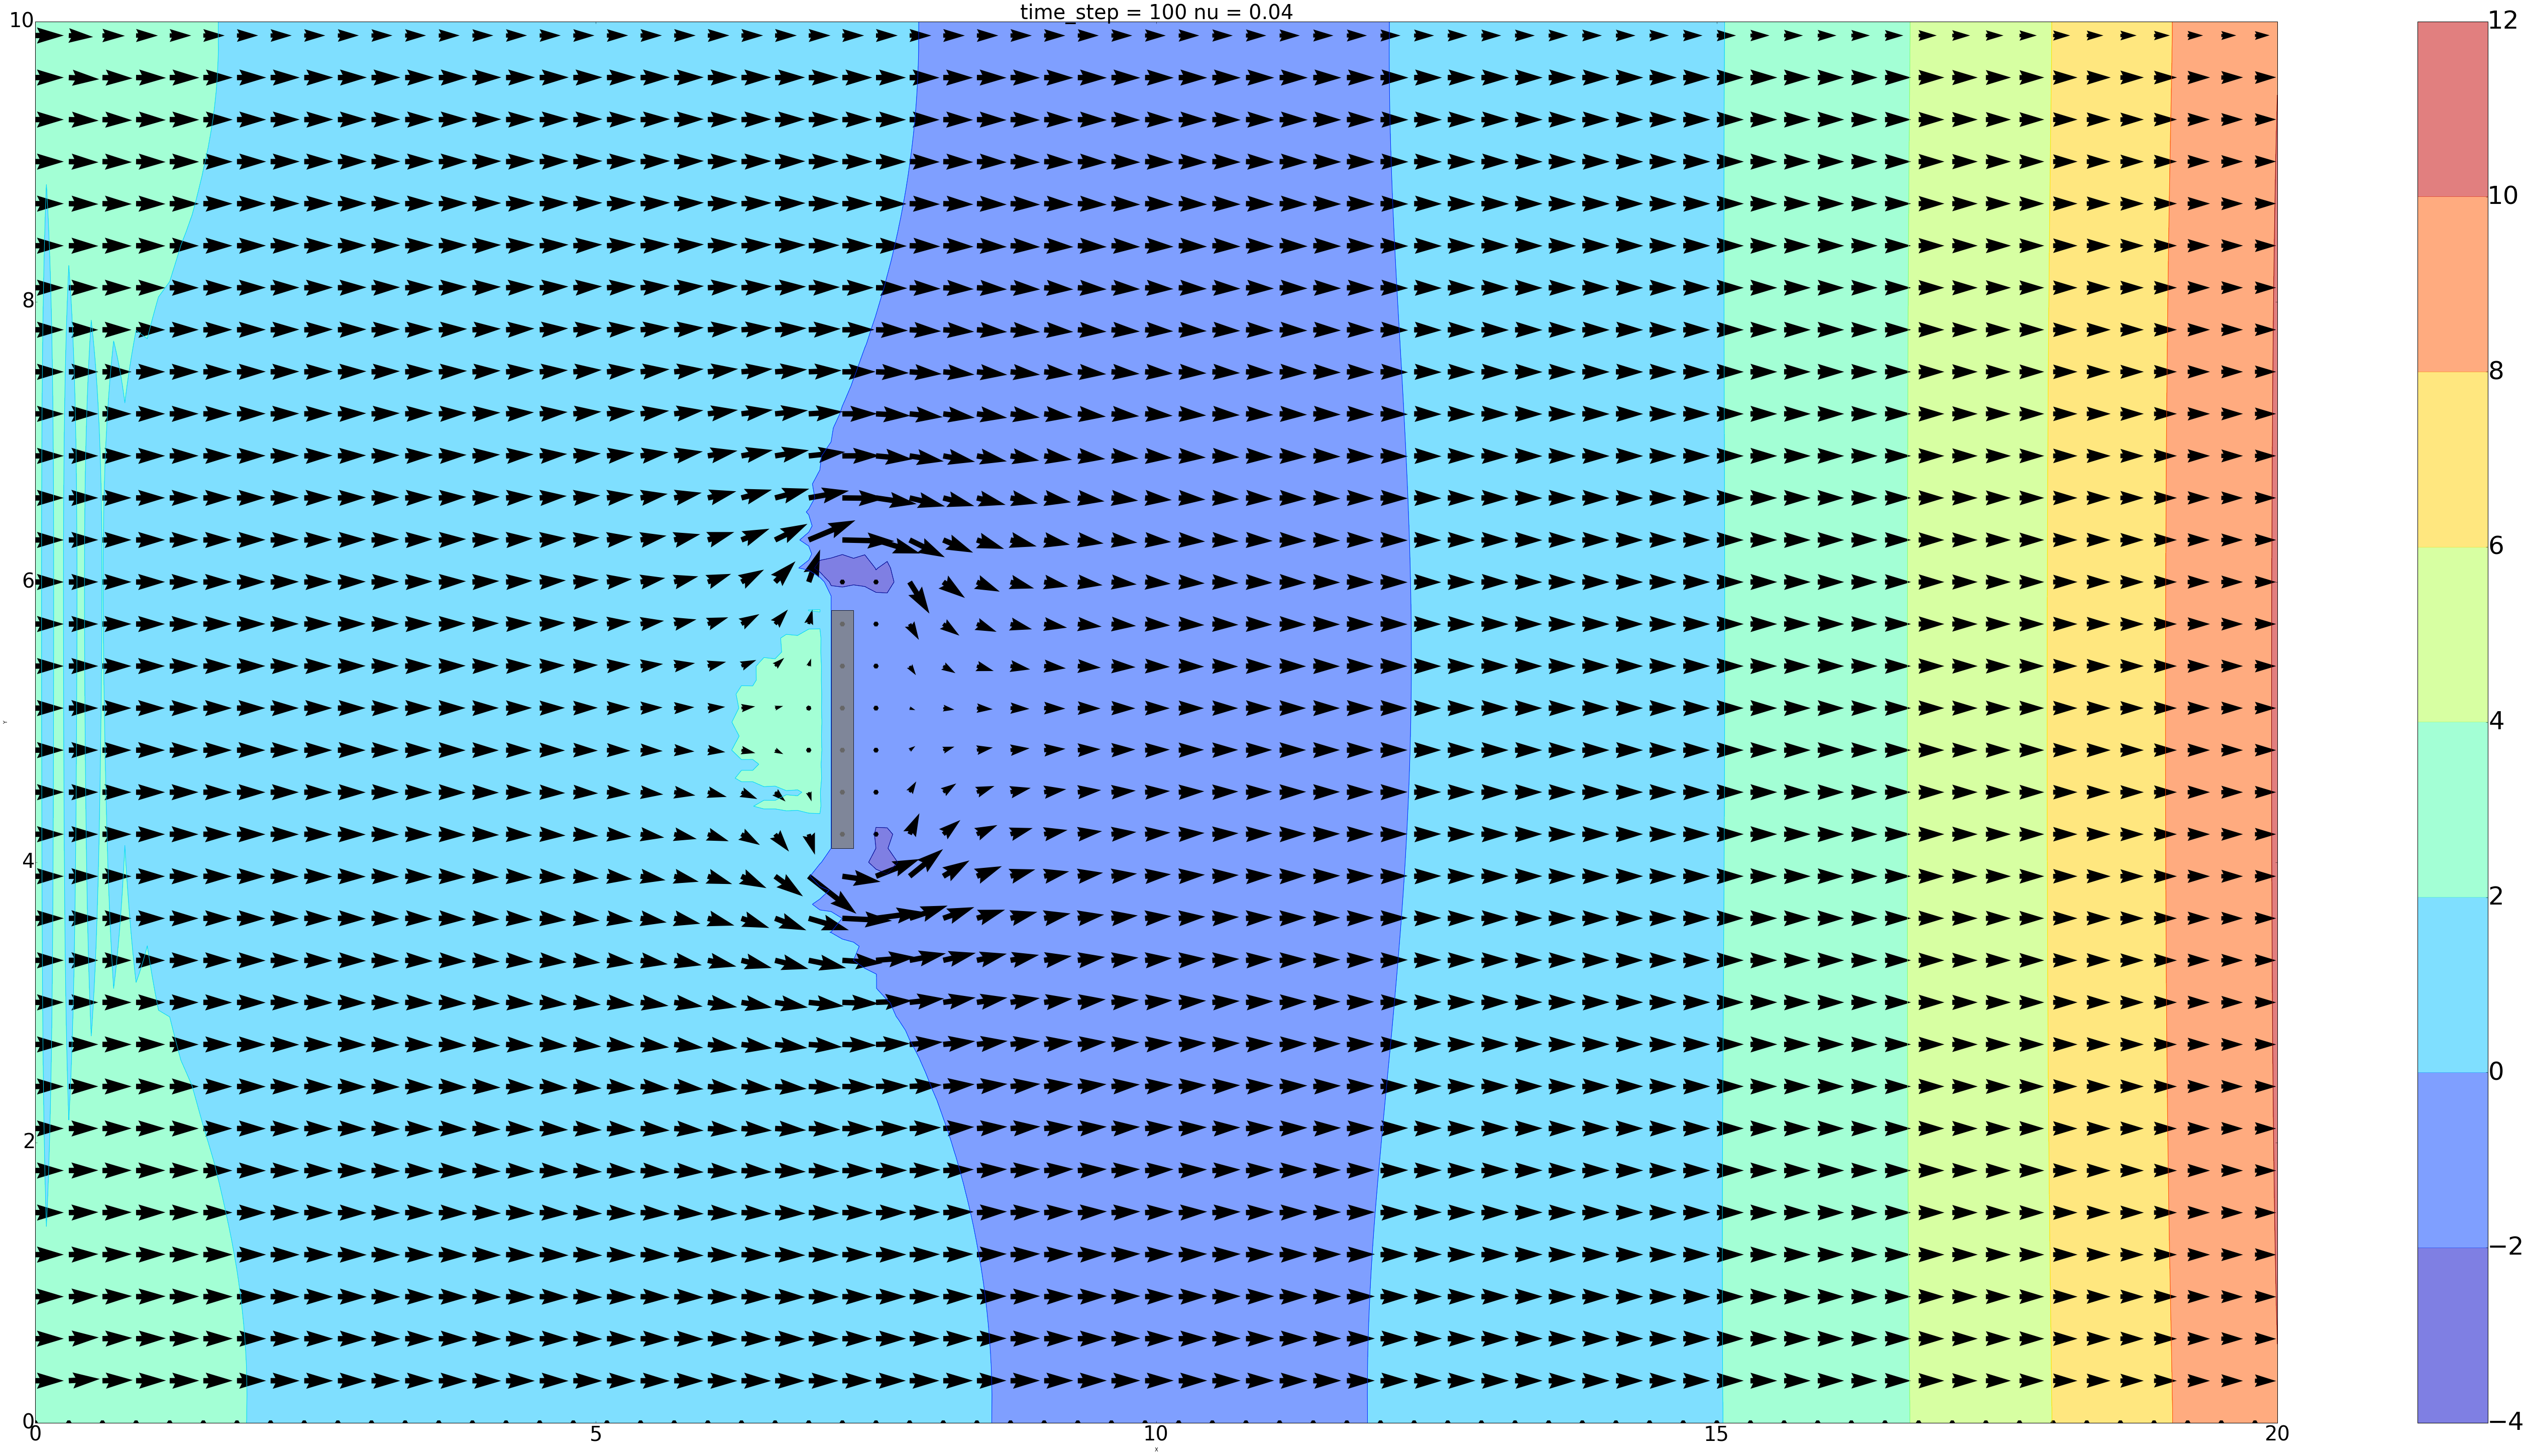

In [42]:
nx = 201  # x-points
ny = 101  # y-points
nit= 50
c =  1                       # phase propagation speed
x_span = 20.0
y_span = 10.0
dx = x_span/(nx-1)           # size of x-grid
dy = y_span/(ny-1)           # size of y-grid
x = np.linspace(0,x_span,nx) # last point included, so exactly nx points
y = np.linspace(0,y_span,ny) # last point included, so exactly ny points
X,Y = np.meshgrid(x,y)       # makes 2-dimensional mesh grid

botb  = 40           # bottom boundary of obstacle
dpth  = 20           # obstacle depth

lftb   = 70          # left boundary of obstacle
wdth   = 5           # obstacle width

Re = 50              # range from 10s to 100s 
nt = 1000            # timesteps

u_start = 1          # initial velocity at the start 
rho = 1              # density                
nu = ((dy*dpth)*u_start)/Re  # viscosity (UL/Re, Re = UL/nu, original value: 0.1)
dt = 0.001               # timesteps

qres = 3                 # quiver plot resolution

v = np.zeros((ny, nx))
u = np.ones((ny, nx))    # for u-velocity I initialise to 1 everywhere

p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

u, v, p = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu, botb, dpth, lftb, wdth, X, Y, u_start)

# Plot the last figure on screen
fig = plt.figure(figsize=(100,50), dpi=25)
plt.contourf(X, Y, p, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=40)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=50) 
plt.contour(X, Y, p)
plt.quiver(X[::qres,::qres],Y[::qres,::qres],u[::qres,::qres],v[::qres,::qres]) ##plotting velocity
plt.broken_barh([(x[lftb+1],x[lftb+wdth-2]-x[lftb+1])], (y[botb+1],y[botb+dpth-2]-y[botb+1]), hold=None, facecolors='grey', alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y');
plt.title('time_step = ' + str(nt) + ' nu = ' + str(nu), fontsize=40)